<a href="https://colab.research.google.com/github/almunawar12/Artificial-Intelligence/blob/main/Tugas_8_2006068.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

In [53]:
data = pd.read_csv('data_paru_paru_anak.csv',sep=';')

print('sample data:')
data.head()


sample data:


,nama,umur,berat_badan,g1,g2,g3,g4,g5,g6,g7,...,g11,g12,g13,g14,g15,g16,g17,g18,g19,label
0,Adyasta Payyadh,5 Tahun,"11,5 Kg",1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,asma
1,Najwa Az Zahra,11 Tahun,43 Kg,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TB
2,Muh Zakir Aisah,8 Tahun,18 Kg,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,CAP
3,Dina Hadyana A,9 Tahun,23 Kg,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,asma
4,Melati Amalia Putri,9 Tahun,25 Kg,1,0,1,1,0,1,1,...,1,0,0,1,0,1,0,0,0,CAP


In [54]:
data.isna().sum()

nama           0
umur           0
berat_badan    0
g1             0
g2             0
g3             0
g4             0
g5             0
g6             0
g7             0
g8             0
g9             0
g10            0
g11            0
g12            0
g13            0
g14            0
g15            0
g16            0
g17            0
g18            0
g19            0
label          0
dtype: int64

In [55]:
data.dtypes

nama           object
umur           object
berat_badan    object
g1              int64
g2              int64
g3              int64
g4              int64
g5              int64
g6              int64
g7              int64
g8              int64
g9              int64
g10             int64
g11             int64
g12             int64
g13             int64
g14             int64
g15             int64
g16             int64
g17             int64
g18             int64
g19             int64
label          object
dtype: object

In [56]:
label_encoder = LabelEncoder()

data['umur'] = label_encoder.fit_transform(data['umur'])
data['berat_badan'] = label_encoder.fit_transform(data['berat_badan'])

print(data)
print(f'Data 3 Tahun {data.iloc[6, 0]}')
print(f'Data 3 Bulan {data.iloc[7, 0]}')

                         nama  umur  berat_badan  g1  g2  g3  g4  g5  g6  g7  \
0             Adyasta Payyadh    10            3   1   0   0   1   0   0   0   
1              Najwa Az Zahra     4           39   1   0   0   0   0   0   0   
2             Muh Zakir Aisah    16           17   1   1   0   1   0   0   1   
3              Dina Hadyana A    18           24   1   0   1   1   0   0   1   
4         Melati Amalia Putri    18           27   1   0   1   1   0   1   1   
..                        ...   ...          ...  ..  ..  ..  ..  ..  ..  ..   
100            muhammad farid     0           48   0   1   1   1   0   1   1   
101  Daffa Dzulhairi Alfarizi     9           41   1   1   0   1   0   0   0   
102        Muh Sultan Syahrir     5            0   1   1   0   1   0   1   0   
103                Nurfadiyah    12           15   0   1   0   1   0   1   1   
104                Alghiffari     0           52   1   1   0   1   0   0   0   

     ...  g11  g12  g13  g14  g15  g16 

In [57]:
x = data.iloc[:, 1:20]
y = data['label']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0 )

In [58]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [59]:
print('Decision Tree Accuracy : {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy : 0.531


[Text(0.55615234375, 0.9583333333333334, 'x[5] <= 0.5\ngini = 0.703\nsamples = 73\nvalue = [24, 28, 12, 9]'),
 Text(0.408203125, 0.875, 'x[17] <= 0.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12, 0, 0]'),
 Text(0.376953125, 0.7916666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0]'),
 Text(0.439453125, 0.7916666666666666, 'x[15] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0]'),
 Text(0.408203125, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.470703125, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.7041015625, 0.875, 'x[13] <= 0.5\ngini = 0.719\nsamples = 60\nvalue = [23, 16, 12, 9]'),
 Text(0.564453125, 0.7916666666666666, 'x[18] <= 0.5\ngini = 0.667\nsamples = 43\nvalue = [19, 13, 2, 9]'),
 Text(0.533203125, 0.7083333333333334, 'x[15] <= 0.5\ngini = 0.632\nsamples = 39\nvalue = [19, 13, 2, 5]'),
 Text(0.37890625, 0.625, 'x[0] <= 11.5\ngini = 0.656\nsamples = 24\nvalue = [8, 11, 2, 3]'),
 Text(0.2578125, 0

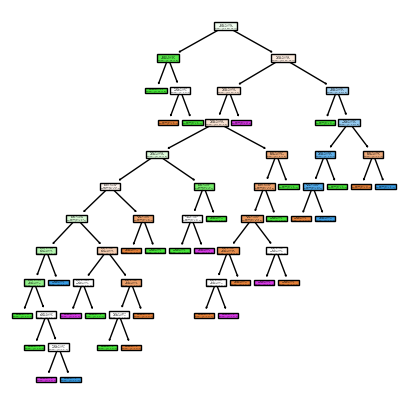

In [60]:
plt.figure(figsize=(5, 5))
tree.plot_tree(dt, filled = True)

In [61]:
kMeans = KMeans(n_clusters=4)
labels = kMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

0.7601798245744622


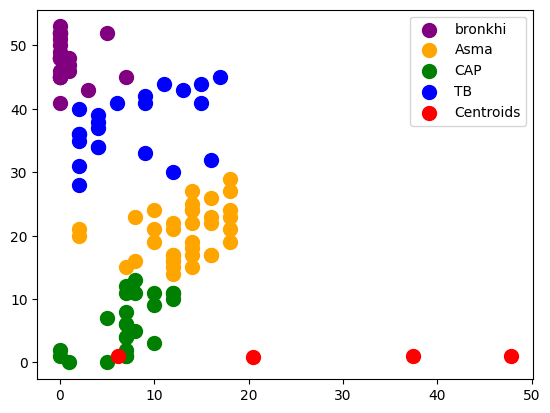

In [63]:
cols = data.columns
plt.scatter(x.loc[labels == 0, cols[1]], 
            x.loc[labels == 0, cols[2]], 
            s= 100, c='purple', 
            label = 'bronkhi')
plt.scatter(x.loc[labels == 1, cols[1]], 
            x.loc[labels == 1, cols[2]], 
            s= 100, c='orange', 
            label = 'Asma')
plt.scatter(x.loc[labels == 2, cols[1]], 
            x.loc[labels == 2, cols[2]], 
            s= 100, c='green', 
            label = 'CAP')
plt.scatter(x.loc[labels == 3, cols[1]], 
            x.loc[labels == 3, cols[2]], 
            s= 100, c='blue', 
            label = 'TB')

plt.scatter(kMeans.cluster_centers_[:, 1], 
            kMeans.cluster_centers_[:, 2], 
            s=100, c='red', 
            label='Centroids')

plt.legend()